# K- nearest neighbour algorithm

# Reading Iris data from CSV file
train-97 or 32
cross-v-30 or 10
test-23  or 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris=pd.read_csv("Iris (1).csv")
print iris.shape
print iris.describe()

(150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


# Plotting the above points

F:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
F:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
F:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


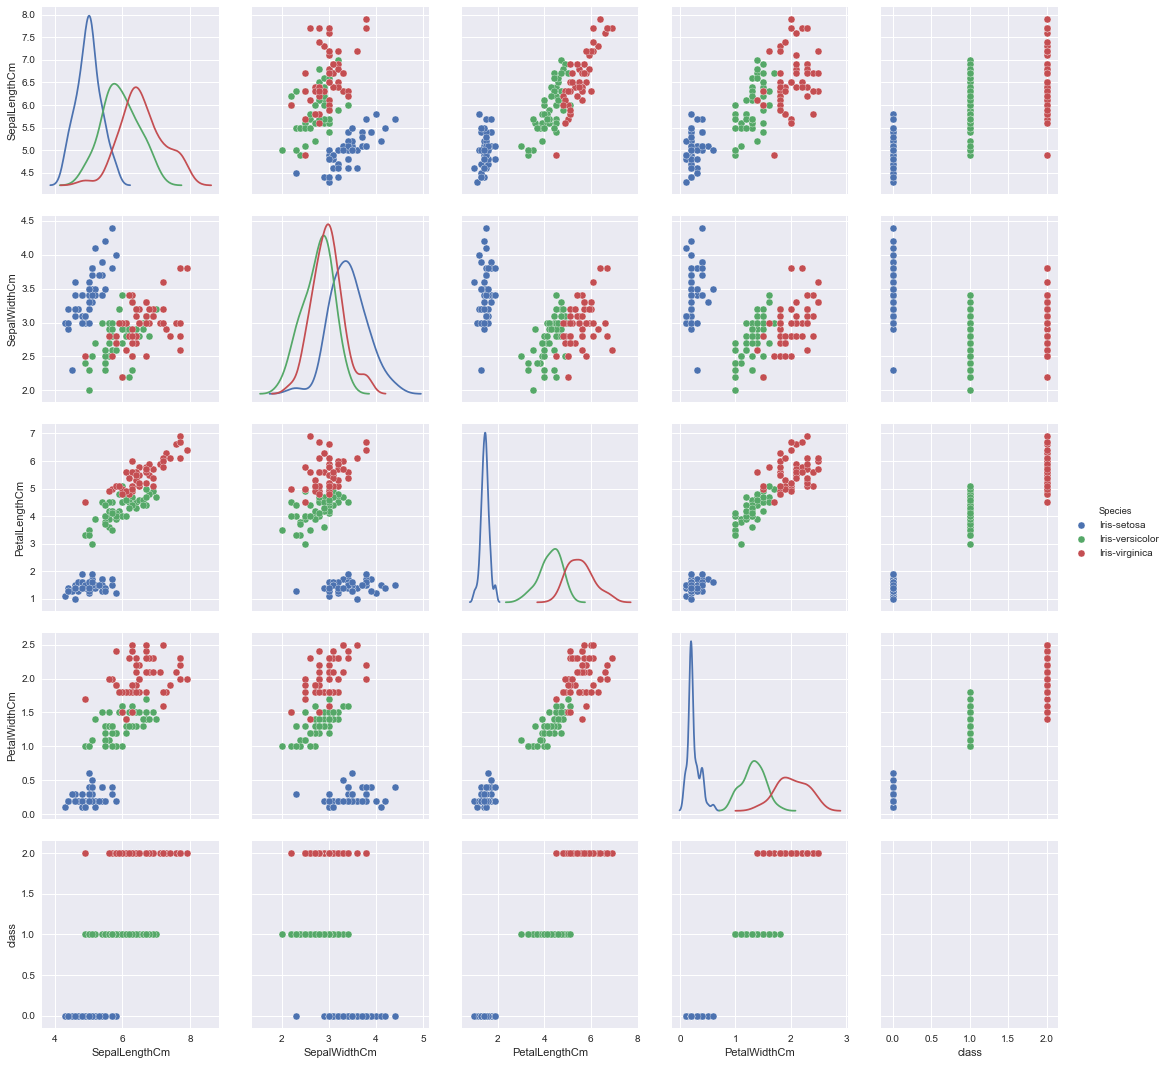

In [4]:
import seaborn as sns
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde");
plt.show()

# Splitting the data into train,cross validate and test sets

In [2]:
import random
c=np.empty(150)
for i in range(150):
    if i<50:
        c[i]=0.0
    elif i<100:
        c[i]=1.0
    else:
        c[i]=2.0
iris["class"]=c
train,test,validate=np.split(iris.sample(frac=1), [int(.65*len(iris)), int(.8*len(iris))])
print train.shape
print validate.shape
print test.shape
#s=random.sample(range(1,150),97)
#i=0
#train=pd.DataFrame.empty
#while i<97:
 #   train.append(iris["id"])
    
#crossv
#test
print train["Species"].value_counts()
print validate["Species"].value_counts()
print test["Species"].value_counts()
print train["class"].value_counts()
print validate["class"].value_counts()
print test["class"].value_counts()

(97, 7)
(30, 7)
(23, 7)
Iris-virginica     35
Iris-setosa        32
Iris-versicolor    30
Name: Species, dtype: int64
Iris-setosa        11
Iris-versicolor    10
Iris-virginica      9
Name: Species, dtype: int64
Iris-versicolor    10
Iris-setosa         7
Iris-virginica      6
Name: Species, dtype: int64
2.0    35
0.0    32
1.0    30
Name: class, dtype: int64
0.0    11
1.0    10
2.0     9
Name: class, dtype: int64
1.0    10
0.0     7
2.0     6
Name: class, dtype: int64


From the above pairplots we observe that th plot between petal_length and petal_width gives the accurate division among the
species of flowers.
Now let us plot the scatter plot on petal_length and petal_width for the train data set.

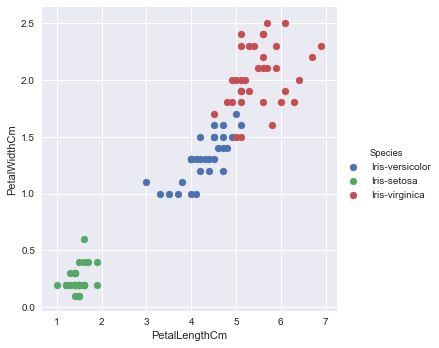

In [5]:
sns.FacetGrid(train, hue="Species", size=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend();
plt.show();

By implementing the K Nearest Neighbor on cross validation set we determine the K value value for the one with best accuracy.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
i=3
acc=[]
new=pd.DataFrame(
{
    "sepallength":train["SepalLengthCm"],
    "sepalwidth":train["SepalWidthCm"],
    "petallength":train["PetalLengthCm"],
    "petalwidth":train["PetalWidthCm"],
})
new1=pd.DataFrame(
{
    "sepallength":validate["SepalLengthCm"],
    "sepalwidth":validate["SepalWidthCm"],
    "petallength":validate["PetalLengthCm"],
    "petalwidth":validate["PetalWidthCm"],
})
k=3
maxi=0
while i in range(21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(new,train["class"])
    pred=knn.predict(new1)
    acc.append(accuracy_score(validate["class"],pred))
    if acc[-1]>=maxi:
        maxi=acc[-1]
        k=i
    i+=1
print maxi
print k
print acc

1.0
20
[0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96666666666666667, 1.0, 1.0, 1.0, 0.96666666666666667, 1.0]


From above we see that we got 96.67% as accuracy for k = 14

In [7]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
new2=pd.DataFrame(
{
    "sepallength":test["SepalLengthCm"],
    "sepalwidth":test["SepalWidthCm"],
    "petallength":test["PetalLengthCm"],
    "petalwidth":test["PetalWidthCm"],
})
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(new,train["class"])
pred=knn.predict(new2)
print ("Accuracy:%f"%(accuracy_score(test["class"],pred)))
print ("Precision:%f"%(precision_score(test["class"],pred,average="macro")))
print ("Recall:%f"%(recall_score(test["class"],pred,average="macro")))

Accuracy:1.000000
Precision:1.000000
Recall:1.000000


After running the k value of 14 on test dataset we see that the accuracy is 100%.

# Normalizing the train,test and validation data

In [8]:
def normal(n):
    s=min(n)
    b=max(n)
    v=b-s
    i=0
    while i<len(n):
        val=(n[i]-s)/v
        n[i]=val
        i+=1
    return n
n=new["petallength"]
print type(n)
print type(new["petallength"])
#n=normal(n)
#print n
#new["petallength"]=n
#new["petalwidth"]=normalize(new["petalwidth"])
#print new["petallength"]

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [9]:
import math as m
def nearest(trainx,trainy,testx,testy):
    i=0
    ed=[]
    while i<len(testx):
        j=0
        ed.append([])
        while j<len(trainx):
            x1=testx[i]
            y1=testy[i]
            x2=trainx[j]
            y2=trainy[j]
            ed[i].append(m.sqrt((x2-x1)**2 + (y2-y1)**2))
            j+=1
        ed[i].sort()
        i+=1
    euclid=np.asarray(ed)
    print euclid.shape
    print euclid[0]
nearest(np.asarray(new["petallength"]),np.asarray(new["petalwidth"]),np.asarray(new1["petallength"]),np.asarray(new1["petalwidth"]))

(30L, 97L)
[ 0.1         0.1         0.14142136  0.2         0.3         0.31622777
  0.36055513  0.36055513  0.41231056  0.41231056  0.41231056  0.41231056
  0.41231056  0.41231056  0.42426407  0.4472136   0.50990195  0.53851648
  0.53851648  0.58309519  0.63245553  0.64031242  0.64031242  0.7
  0.70710678  0.72801099  0.80622577  0.82462113  0.85440037  0.86023253
  0.92195445  0.92195445  0.92195445  0.94339811  0.94339811  0.98488578
  0.98488578  0.98994949  1.02956301  1.06301458  1.06301458  1.08166538
  1.2083046   1.2083046   1.22065556  1.23693169  1.28062485  1.28062485
  1.3453624   1.36014705  1.41421356  1.48660687  1.48660687  1.50332964
  1.56204994  1.56204994  1.56204994  1.7         1.70293864  1.7691806
  1.84390889  1.98494332  2.14009346  2.30217289  2.50599282  3.80788655
  3.91152144  3.98120585  3.98246155  4.07062649  4.15932687  4.1677332
  4.1677332   4.1677332   4.1677332   4.25440948  4.25440948  4.25440948
  4.25440948  4.25440948  4.29418211  4.29418211 